In [1]:
import numpy as np

def generate_dataset(N, m, n, sigma_sq, mu):
    # Step 1: 随机生成 A, y_t 和 e_t
    A = np.random.randn(n, m)  # 随机生成 A，尺寸为 n x m
    X = []  # 用于存储 x_t 的列表
    
    for t in range(N):
        # 从均值为0，协方差矩阵为I的高斯分布中生成 y_t (尺寸为 m)
        y_t = np.random.randn(m)
        
        # 从均值为0，协方差矩阵为 sigma^2 * I 的高斯分布中生成噪声 e_t (尺寸为 n)
        e_t = np.random.normal(0, np.sqrt(sigma_sq), n)
        
        # 计算 x_t = A * y_t + mu + e_t
        x_t = np.dot(A, y_t) + mu + e_t
        
        # 添加到 X 列表中
        X.append(x_t)
    
    # 返回所有 x_t 的数据集 X
    return np.array(X)

# 参数设置
N = 100   # 样本数
m = 3     # y_t 的维度
n = 10    # x_t 的维度
sigma_sq = 0.1  # 噪声的方差
mu = np.zeros(n)  # mu 是 n 维零向量

# 生成数据集
X = generate_dataset(N, m, n, sigma_sq, mu)

# 打印生成的数据集的一部分
print(X[:5])  # 打印前5个 x_t


[[ 0.21211138  0.28353537 -0.03453692 -0.50369877 -4.20675084 -2.04746725
   0.14196878  0.81946378 -0.20462163  0.48773775]
 [ 3.25752874 -0.9736186   3.81222177  1.77745136  3.21598757 -1.22816078
   0.64190784 -3.80587034 -2.75541136  1.37876947]
 [-1.11928838  0.88145141 -0.86469645 -1.8474901  -5.16569165 -2.38534335
  -0.6780615   2.44335704  1.21994913  1.12533836]
 [ 0.29050418  0.22522657 -1.75633131  0.12663582  1.93712614  3.7429648
  -0.30383963  0.06564635  1.77163004 -3.10306232]
 [ 3.88619391 -0.40886175  1.07527588 -0.16544235 -0.75170453  0.36516588
  -0.23655448 -0.71310292 -0.79307104 -0.33922311]]


In [5]:
import numpy as np
from sklearn.decomposition import FactorAnalysis
from sklearn.mixture import GaussianMixture
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def calculate_aic_bic(model, X, n_factors):
    """
    计算给定因子分析模型的 AIC 和 BIC
    """
    # 获取模型的对数似然
    log_likelihood = model.score(X) * X.shape[0]
    
    # 计算 AIC 和 BIC
    n_samples, n_features = X.shape
    n_params = n_factors * n_features + n_factors  # 参数数目: (m * n) + m
    aic = 2 * n_params - 2 * log_likelihood
    bic = np.log(n_samples) * n_params - 2 * log_likelihood
    return aic, bic

def select_factors_using_aic_bic(X, max_factors=10):
    """
    使用 AIC 和 BIC 来选择最佳的隐变量维度
    """
    aics = []
    bics = []
    
    for m in range(1, max_factors + 1):
        # 进行因子分析
        model = FactorAnalysis(n_components=m)
        model.fit(X)
        
        # 计算 AIC 和 BIC
        aic, bic = calculate_aic_bic(model, X, m)
        aics.append(aic)
        bics.append(bic)
    
    # 选择具有最小 AIC 和 BIC 的模型
    best_aic_idx = np.argmin(aics)
    best_bic_idx = np.argmin(bics)
    
    # print(f"Best number of factors by AIC: {best_aic_idx + 1} with AIC={aics[best_aic_idx]}")
    # print(f"Best number of factors by BIC: {best_bic_idx + 1} with BIC={bics[best_bic_idx]}")
    
    # 返回最佳的维度
    return best_aic_idx + 1, best_bic_idx + 1

# 生成数据集
N = 100  # 样本数
m = 3    # y_t 的维度（真实的m）
n = 10     # x_t 的维度
sigma_sq = 0.1  # 噪声的方差
mu = np.zeros(n)  # mu 是 n 维零向量

# 生成数据集
X = generate_dataset(N, m, n, sigma_sq, mu)

# 选择最佳的因子维度
best_aic_dim, best_bic_dim = select_factors_using_aic_bic(X)

# 对于最佳维度进行因子分析
fa_best_aic = FactorAnalysis(n_components=best_aic_dim)
fa_best_aic.fit(X)
y_best_aic = fa_best_aic.transform(X)

fa_best_bic = FactorAnalysis(n_components=best_bic_dim)
fa_best_bic.fit(X)
y_best_bic = fa_best_bic.transform(X)

# 打印结果
print(f"隐变量维度（AIC选择的维度）: {best_aic_dim}")
print(f"隐变量维度（BIC选择的维度）: {best_bic_dim}")

# 可视化因子分析的结果（仅当维度为2或3时）
if best_aic_dim == 2:
    plt.scatter(y_best_aic[:, 0], y_best_aic[:, 1])
    plt.title("Factor Analysis (AIC Best Dim)")
    plt.show()

if best_bic_dim == 2:
    plt.scatter(y_best_bic[:, 0], y_best_bic[:, 1])
    plt.title("Factor Analysis (BIC Best Dim)")
    plt.show()


隐变量维度（AIC选择的维度）: 3
隐变量维度（BIC选择的维度）: 3


In [7]:
import pandas as pd

config = [
    {"N": 100, "n": 10, "m": 3, "sigma_sq": 0.1 , "mu": 0},
    {"N": 100, "n": 10, "m": 4, "sigma_sq": 0.1 , "mu": 0},
    {"N": 100, "n": 10, "m": 5, "sigma_sq": 0.1 , "mu": 0},
    {"N": 100, "n": 10, "m": 6, "sigma_sq": 0.1 , "mu": 0},
    {"N": 100, "n": 20, "m": 5, "sigma_sq": 0.1 , "mu": 0},
    {"N": 100, "n": 20, "m": 6, "sigma_sq": 0.1 , "mu": 0},
    {"N": 100, "n": 20, "m": 6, "sigma_sq": 1.0 , "mu": 0},
    {"N": 100, "n": 20, "m": 6, "sigma_sq": 2.0, "mu": 0},
    {"N": 100, "n": 20, "m": 6, "sigma_sq": 3.0, "mu": 0},
    {"N": 50, "n": 20, "m": 6, "sigma_sq": 0.1, "mu": 0},
    {"N": 20, "n": 20, "m": 6, "sigma_sq": 0.1, "mu": 0},
]

def run_experiment(config):
    results = []
    for param in config:
        N = param["N"]
        n = param["n"]
        m = param["m"]
        sigma_sq = param["sigma_sq"]
        mu = param["mu"]
        
        # 生成数据集
        X = generate_dataset(N, m, n, sigma_sq, mu)
        
        # 选择最佳的因子维度
        best_aic_dim, best_bic_dim = select_factors_using_aic_bic(X)
        
        # 存储结果
        result = {
            "N": N,
            "n": n,
            "m (True)": m,  # 真实的隐变量维度
            "sigma_sq": sigma_sq,
            "mu": mu,
            "Best AIC Dim": best_aic_dim,
            "Best BIC Dim": best_bic_dim
        }
        results.append(result)
    
    # 转换为 DataFrame 格式并返回
    df = pd.DataFrame(results)
    return df

# 运行实验并获取结果
df_results = run_experiment(config)

# 打印表格结果
print(df_results)

      N   n  m (True)  sigma_sq  mu  Best AIC Dim  Best BIC Dim
0   100  10         3       0.1   0             3             3
1   100  10         4       0.1   0             4             4
2   100  10         5       0.1   0             5             5
3   100  10         6       0.1   0             6             6
4   100  20         5       0.1   0             5             5
5   100  20         6       0.1   0             6             6
6   100  20         6       1.0   0             6             6
7   100  20         6       2.0   0             6             5
8   100  20         6       3.0   0             6             5
9    50  20         6       0.1   0             6             6
10   20  20         6       0.1   0             6             6


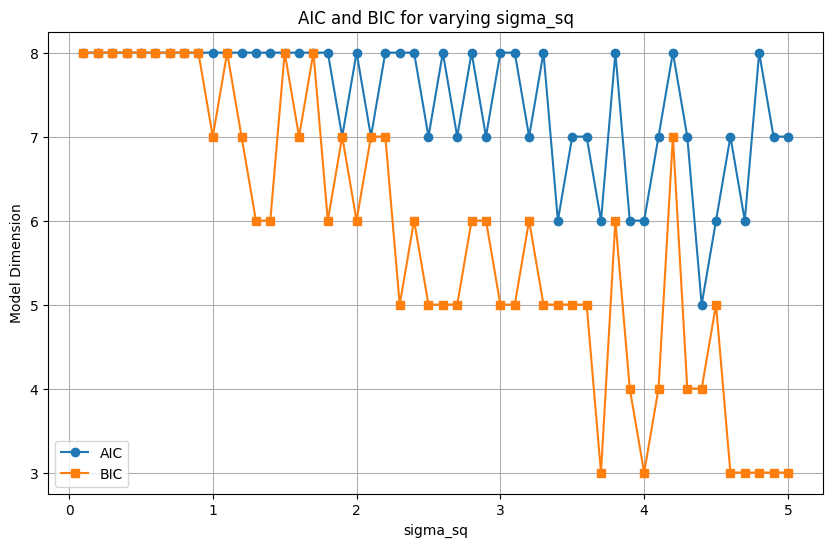

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import FactorAnalysis

# 默认配置参数列表
config_default = {"N": 100, "n": 20, "m": 8, "sigma_sq": 1.0, "mu": 0}

def run_experiment_for_control_variable(param, param_to_vary, values_to_vary):
    """
    对某个参数进行对比实验，固定其他参数并变化指定参数，计算AIC和BIC。
    
    config: 基础配置
    param_to_vary: 要变化的参数名称
    values_to_vary: 该参数的不同取值
    """
    aic_values = []
    bic_values = []
    
    # 遍历变化的参数值
    for value in values_to_vary:
        
        # 生成数据集
        N = param["N"] if param_to_vary != "N" else value
        n = param["n"] if param_to_vary != "n" else value
        m = param["m"] if param_to_vary != "m" else value
        sigma_sq = param["sigma_sq"] if param_to_vary != "sigma_sq" else value
        mu = param["mu"]
        
        X = generate_dataset(N, m, n, sigma_sq, mu)
        
        # 选择最佳的因子维度
        best_aic_dim, best_bic_dim = select_factors_using_aic_bic(X)
        
        # 存储结果
        aic_values.append(best_aic_dim)
        bic_values.append(best_bic_dim)
    
    return aic_values, bic_values

def plot_results(values_to_vary, aic_values, bic_values, param_to_vary):
    """
    绘制AIC和BIC随参数变化的折线图
    """
    plt.figure(figsize=(10, 6))
    plt.plot(values_to_vary, aic_values, label='AIC', marker='o')
    plt.plot(values_to_vary, bic_values, label='BIC', marker='s')
    
    plt.xlabel(param_to_vary)
    plt.ylabel('Model Dimension')
    plt.title(f'AIC and BIC for varying {param_to_vary}')
    plt.legend()
    plt.grid(True)
    plt.show()

# 实验设置：固定其他参数，变化某个参数
param_to_vary = 'sigma_sq'  # 可选择 'N', 'sigma_sq', 'm', 'n'
# values_to_vary = [10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110,115,120,125,130,135,140,145,150,155,160,165,170,175,180,185,190,195,200,205,210,215,220,225,230,235,240,245,250,255,260,265,270,275,280,285,290,295,300] 
# values_to_vary = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
# values_to_vary = [10,12,14,16,18,20,22,24,26,28,30]
values_to_vary = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0]

# 运行实验并获取AIC和BIC结果
aic_values, bic_values = run_experiment_for_control_variable(config_default, param_to_vary, values_to_vary)

# 绘制结果
plot_results(values_to_vary, aic_values, bic_values, param_to_vary)
